In [6]:
%matplotlib notebook

import matplotlib.pyplot as plt
from twython import Twython
import json
import re

In [7]:
CREDS=json.loads(open('./creds.json').read())

In [8]:
twitter = Twython(CREDS['consumer_key'], CREDS['consumer_secret'], CREDS['access_token'], CREDS['access_token_secret'])
tweets = twitter.get_user_timeline(screen_name='britainelects', count=200)

In [9]:
KEEP_KEYS = [ 'created_at', 'retweet_count', 'text' ]
westminster = [ { k: t[k] for k in KEEP_KEYS } for t in tweets if t['text'].startswith('Westminster voting intention') ]

In [21]:
PATTERN = "([A-Z]+):? ([0-9]+)%"
def calc_diff(input):
    intention = dict(re.findall(PATTERN, input))
    return int(intention['CON']) - int(intention['LAB'])

<IPython.core.display.Javascript object>


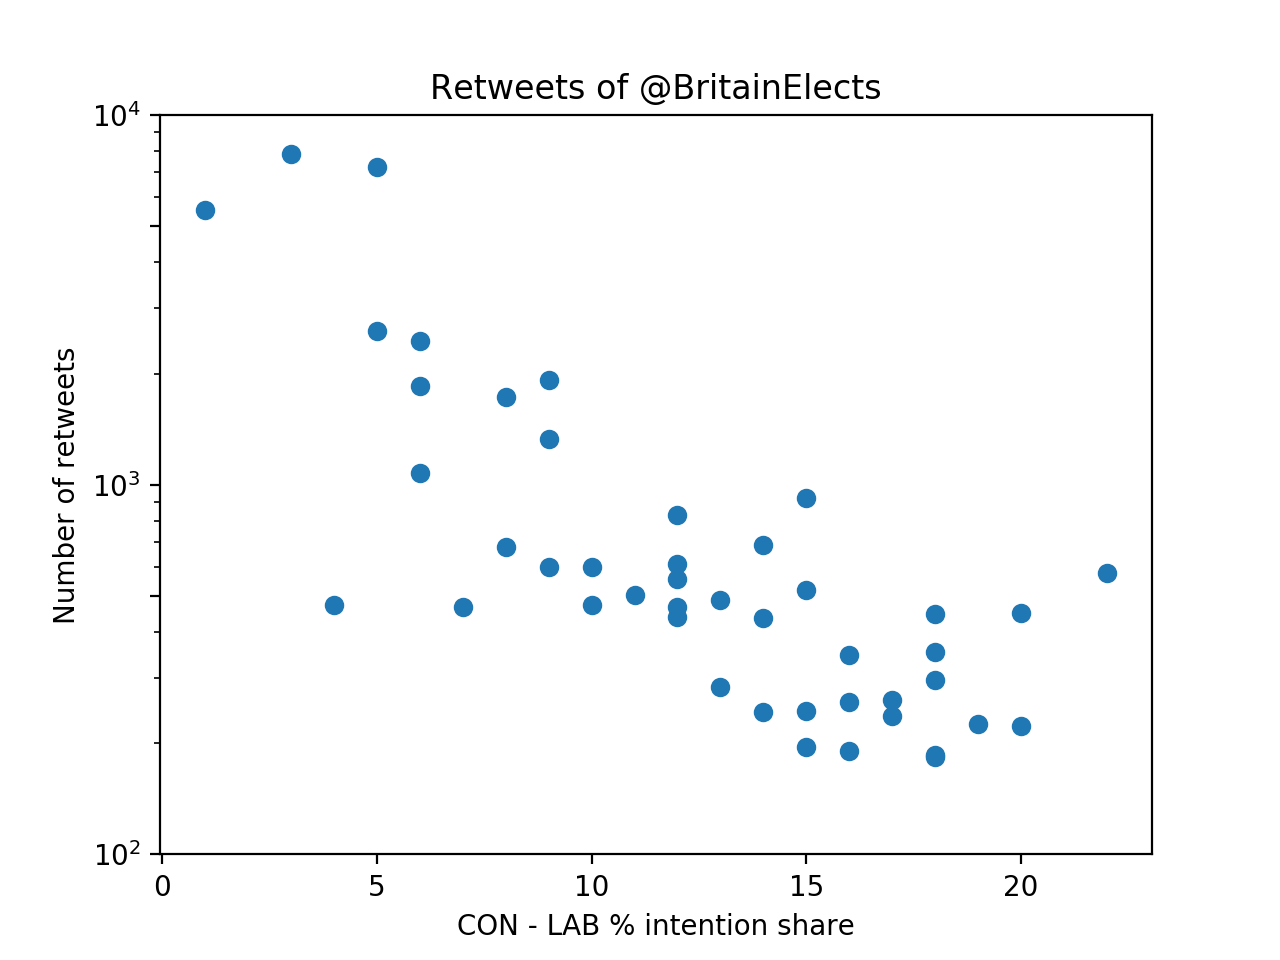

In [34]:
xs = [ calc_diff(t['text']) for t in westminster ]
ys = [ t['retweet_count'] for t in westminster ]
plt.scatter(xs, ys)
plt.title('Retweets of @BritainElects')
plt.yscale('log')
plt.yticks([100, 500, 1000, 5000, 10000])
plt.xlabel('CON - LAB % intention share')
plt.ylabel('Number of retweets')